In [1]:
import pandas as pd

In [2]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']

In [4]:
adult_data = pd.read_csv('data-science-complete-tutorial/Data/adult.data.txt', names=cols)

In [5]:
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Salary            object
dtype: object

In [7]:
cat_adult_data = adult_data.select_dtypes(include=['object'])

In [12]:
adult_data.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoders = {}
for col in cat_adult_data.columns:
    le = LabelEncoder()
    label_encoders[col] = le.fit(cat_adult_data[col])
    adult_data[col+'_en'] = le.transform(cat_adult_data[col])

In [14]:
label_encoders['Salary'].transform([' <=50K',' <=50K'])

array([0, 0])

In [16]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,Salary,workclass_en,education_en,marital-status_en,occupation_en,relationship_en,race_en,sex_en,native-country_en,Salary_en
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,<=50K,7,9,4,1,1,4,1,39,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,<=50K,6,9,2,4,0,4,1,39,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,<=50K,4,11,0,6,1,4,1,39,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,<=50K,4,1,2,6,0,2,1,39,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,<=50K,4,9,2,10,5,2,0,5,0


# Unsupervised Learning

In [20]:
house_data = pd.read_csv('data-science-complete-tutorial/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [21]:
house_data.sample(10)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
379,1167.024,2,12,3,2,2,38000
124,2134.800,3,6,3,2,2,68000
639,1889.298,18,21,3,2,2,70000
87,3255.570,4,7,4,2,4,130000
502,2455.020,12,25,4,2,2,110000
67,1067.400,4,5,3,2,1,33500
264,711.600,8,14,1,1,1,36000
267,1127.886,4,5,3,2,2,26000
113,857.478,6,9,4,2,2,52000
630,1174.140,10,12,3,2,2,41000


* You are a real estate owner
* You have 4 rep reporting to you
* You want to assign each rep same type of houses

In [22]:
from sklearn.cluster import KMeans

In [23]:
cluster_algo = KMeans(n_clusters=4)

In [24]:
cluster_algo.fit(houese_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
labels = cluster_algo.predict(house_data)

In [32]:
houese_data[labels == 3]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
7,1352.040,5,7,3,2,1,58000
10,1423.200,4,5,4,2,2,65000
15,2134.800,10,19,3,2,2,55000
23,747.180,7,15,2,2,1,55000
31,1732.746,8,12,4,2,2,65000
33,2134.800,10,19,3,2,2,55000
34,1206.162,7,7,2,2,1,57000


In [35]:
house_data_subset = house_data[['Sqft','Price']]

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=house_data_subset.Price, y=house_data_subset.Sqft, s=10)
plt.xlabel('Price')
plt.ylabel('Sqft')

In [41]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(house_data_subset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
labels = kmeans.predict(house_data_subset)

Text(0, 0.5, 'Sqft')

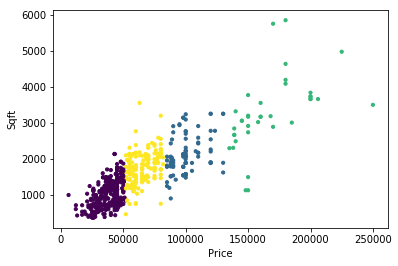

In [44]:
plt.scatter(x=house_data_subset.Price, y=house_data_subset.Sqft, s=10, c=labels)
plt.xlabel('Price')
plt.ylabel('Sqft')

### Exercise
1. Find 3 categories of people in the company for HR_data
2. Steps
   - Transform all the categorical data to num
   - Use KMeans to find similar people